# **<font color='#FF5733'>WHY AM I GETTING BAD GRADES IF I TRY VERY HARD?</font>**

##**<font color='#FF5733'>An analysis on student performance in grade schools</font>**


### **<font color='#FF5733'>Data Science Capstone Project Part 2, Fall 2024 </font>**

##Archisa Bhattacharya

**PROJECT LINKS:**

Kaggle Dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

---

# **<font color='violet'>Libraries</font>**

In [3]:
from google.colab import files
import numpy as np
import pandas as pd
import io

# **<font color='violet'>Part 1:</font> Loading the Data, EDA, & Data Cleaning**

## **<font color='green'>Loading the Data </font>**

In [6]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read in data path

iris_data_path = '/content/drive/My Drive/DSCapstone_Ass2/Iris.csv'
rain_data_path = '/content/drive/My Drive/DSCapstone_Ass2/usa_rain_prediction_dataset_2024_2025.csv'
planet_data_path = '/content/drive/My Drive/DSCapstone_Ass2/Planet1.csv'
cereal_data_path = '/content/drive/My Drive/DSCapstone_Ass2/cereal.csv'

student_data_path = '/content/drive/My Drive/DSCapstone_Ass2/StudentPerformanceFactors.csv'




Lets try to compare all of the different data sets we are considering and see if we can find any interesting patterns in the data visually, through a heatmap of the correlation matrix. This will let us easily see which values appear to be correlated to each other. While correlation does not equal causation, this will help us have a nice jumping-off point!

In [8]:
# Import CSV into Pandas dataframe

irisdf = pd.read_csv(iris_data_path)
irisdf


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


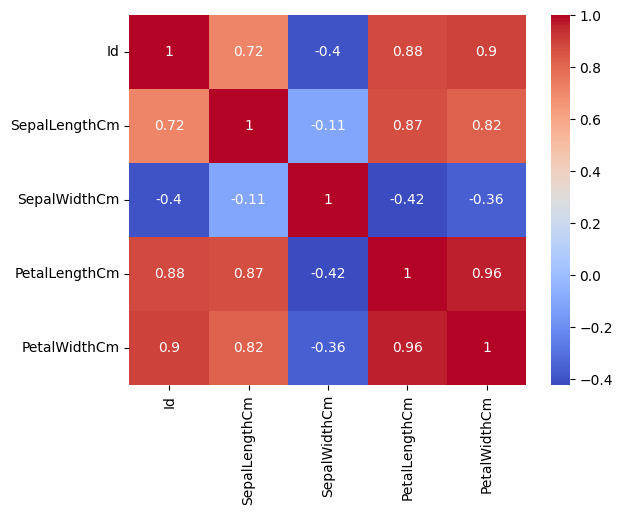

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = irisdf.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
raindf = pd.read_csv(rain_data_path)
raindf


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


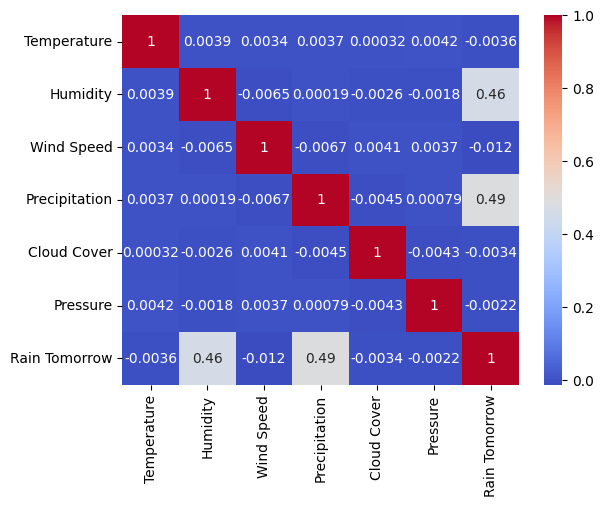

In [15]:
corr_matrix = raindf.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
planetdf = pd.read_csv(planet_data_path)
planetdf

,Name,Type,Dominant Color,Mass (10^23kg),Radius (10km),Density (g/cm^3),Surface Gravity (m/s^2),Escape Velocity (km/s),Mean Temperature (�C),Surface Pressure (Pa),...,Aphelion (AU),Perihelion (AU),Geological Activity,Ring System,Magnetic Field Strength,Greenhouse Effect,Maximum Wind Speed (km/h),Average Distance from the Sun (million km),Surface Characteristics,Most Abundant Element
0,Mercury,Terrestrial,Grey Brown,3.30,2439.7,5.43,3.70,4.25,167,0.0,...,0.466,0.307,False,No,Weak,Minimal,Minimal,57.9,Rocky surface,Iron
1,Venus,Terrestrial,Yellow,48.70,6051.8,5.24,8.87,10.36,464,92000.0,...,0.728,0.718,True,No,Weak,Extreme,360,108.2,Rocky surface,Carbon Dioxide
2,Earth,Terrestrial,Blue,59.70,6371.0,5.52,9.81,11.19,15,101325.0,...,1.017,0.983,True,No,Strong,Moderate,300,149.6,Diverse surface,Nitrogen
3,Mars,Terrestrial,Red,6.42,3389.5,3.93,3.71,5.03,-65,610.0,...,1.666,1.381,False,No,Weak,Weak,100,227.9,Rocky surface,Iron Oxide
4,Jupiter,Gas Giant,Orange Brown,19000.00,69911.0,1.33,24.79,59.50,-110,NaN,...,5.460,4.950,False,Yes,Strong,Minimal,432,778.5,No solid surface,Hydrogen
5,Saturn,Gas Giant,Yellow,5680.00,58232.0,0.69,10.44,35.50,-140,NaN,...,10.120,9.050,False,Yes,Strong,Minimal,1800,1430.0,No solid surface,Hydrogen
6,Uranus,Ice Giant,Blue Green,868.00,25362.0,1.27,8.69,21.30,-195,NaN,...,20.110,18.330,False,Yes,Weak,Minimal,900,2870.0,No solid surface,Hydrogen
7,Neptune,Ice Giant,Blue,1020.00,24622.0,1.64,11.15,23.50,-200,NaN,...,30.330,29.810,False,Yes,Strong,Minimal,2100,4500.0,No solid surface,Hydrogen


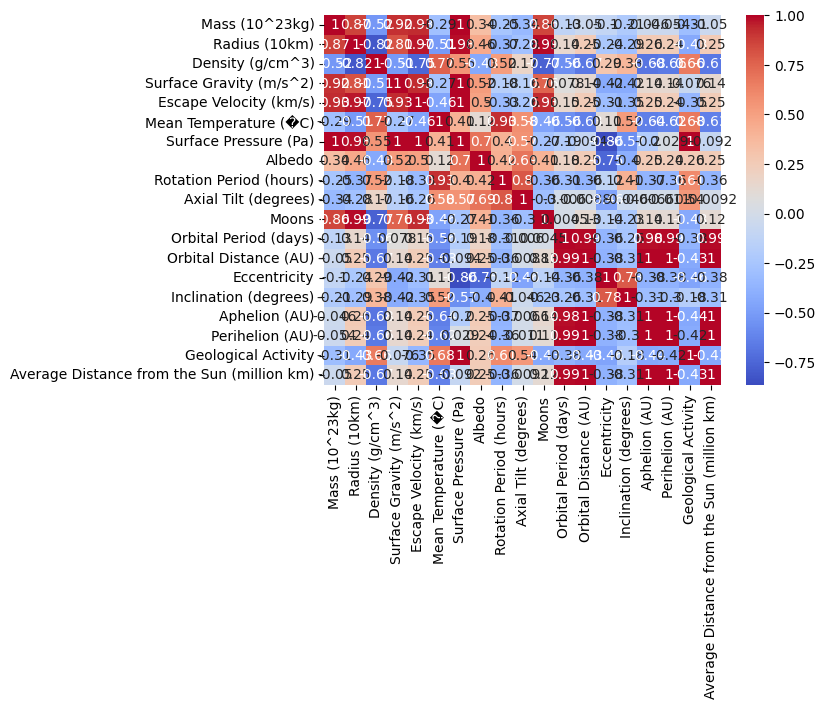

In [16]:
corr_matrix = planetdf.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
cerealdf = pd.read_csv(cereal_data_path)
cerealdf

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


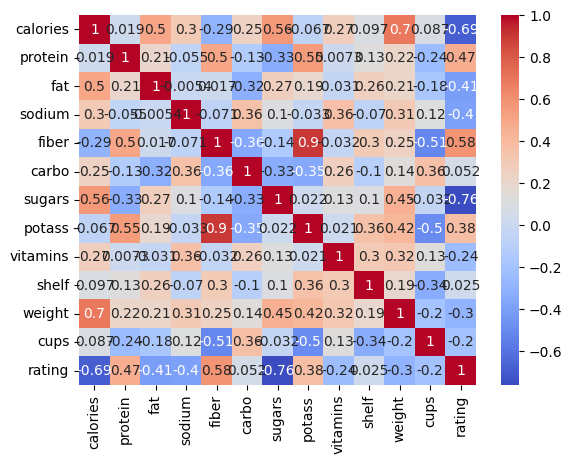

In [17]:
corr_matrix = cerealdf.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
studentdf = pd.read_csv(student_data_path)
studentdf

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


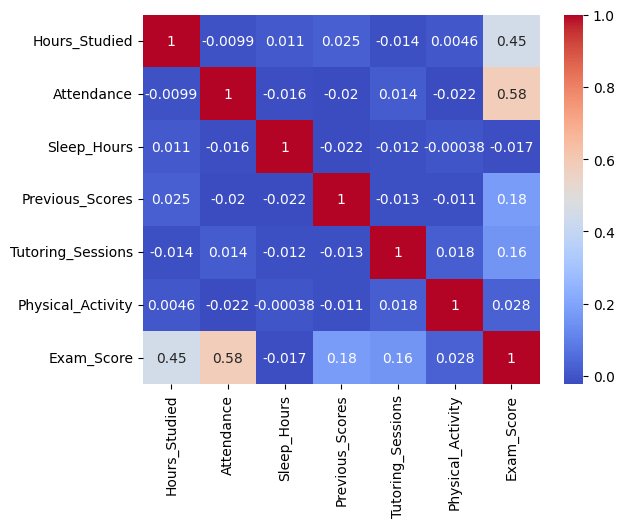

In [18]:
corr_matrix = studentdf.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## **<font color='green'>Choosing the Right Data</font>**




In [19]:
df = studentdf

In [20]:
df.shape

(6607, 20)

In [21]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [23]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## **<font color='green'>Data Cleaning</font>**

### **<font color='teal'>1. Missing Values</font>**

There are no missing values in the dataset

In [24]:
df.count().isnull()

,0
Hours_Studied,False
Attendance,False
Parental_Involvement,False
Access_to_Resources,False
Extracurricular_Activities,False
Sleep_Hours,False
Previous_Scores,False
Motivation_Level,False
Internet_Access,False
Tutoring_Sessions,False


### **<font color='teal'>2. Categorical Data Pollution</font>**

Checking for misspellings, excess whitespaces, etc. to standardize the categorical columns

In [25]:
# Standardizing 'Gender' column by correcting potential typos

df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].replace({'femal': 'female', 'malee': 'male'})


### **<font color='teal'>3. Numerical Data Pollution</font>**

Using the IQR method to find and remove invalid characters and outliers for the numerical columns & marking extreme outliers as NaN

In [26]:
df = df.dropna()
df.dropna(subset=['Teacher_Quality'], inplace=True)
df.head()

<ipython-input-26-ce23775419af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Teacher_Quality'], inplace=True)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,female,70


In [27]:
# Checking for any remaining invalid entries
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [28]:
# Cleaned data
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,female,70


# **<font color='violet'>Part 2:</font> Clickbait Worthy Findings**
TASK: Develop at least two hypotheses and complete either a permutation test or z-test to justify the respective finding. Explain why your claims are supported by the data, and discuss their interesting implications.

### **<font color='teal'>Hypothesis 1: The Impact of Extracurriculars on Student Test Scores </font>**

H0: There is **NO DIFFERENCE** in exam scores between students who do or do not participate in extracurricular activities. \\


HA: There **IS A DIFFERENCE** in exam scores between students who do or do not participate in extracurricular activities.


In [29]:
import numpy as np
import scipy.stats as stats

# Extracurricular Activities data
ecYes = df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score']
ecNo = df[df['Extracurricular_Activities'] == 'No']['Exam_Score']

# mean, st dev & sample sizes
mean_yes = np.mean(ecYes)
mean_no = np.mean(ecNo)
std_yes = np.std(ecYes, ddof=1)
std_no = np.std(ecNo, ddof=1)
n_yes = len(ecYes)
n_no = len(ecNo)

# Z statistic
zstatEC = (mean_yes - mean_no) / np.sqrt((std_yes**2/n_yes) + (std_no**2/n_no))

# P-value
pvalEC = 2 * (1 - stats.norm.cdf(np.abs(zstatEC)))

if pvalEC < 0.05:
    print("Reject the null hypothesis. There is a significant difference in exam scores between students who do and do not participate in extracurricular activities.")
    print("Z-statistic:", zstatEC)
    print("P-value:", pvalEC)
else:
    print("Fail to reject the null hypothesis. There is no significant difference in exam scores between students who do and do not participate in extracurricular activities.")

Reject the null hypothesis. There is a significant difference in exam scores between students who do and do not participate in extracurricular activities.
Z-statistic: 5.0872502640494215
P-value: 3.6329230024279013e-07


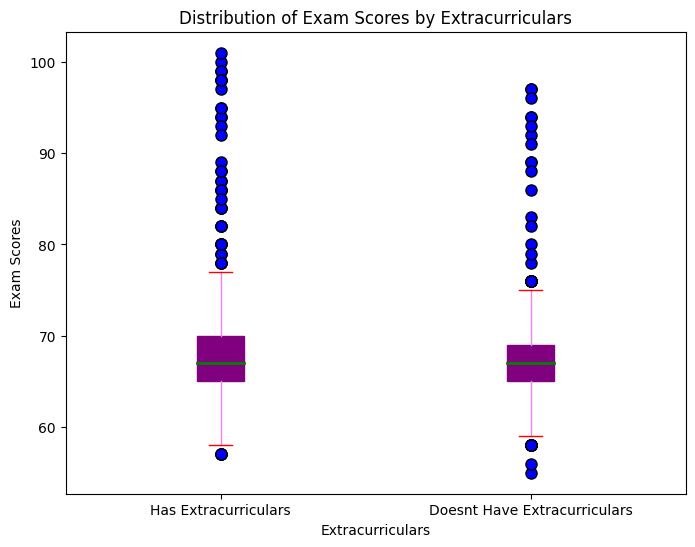

In [30]:
data_to_plot = [ecYes, ecNo]

plt.figure(figsize=(8, 6))
box = plt.boxplot(
    data_to_plot,
    labels=['Has Extracurriculars', 'Doesnt Have Extracurriculars'],
    patch_artist=True,
    boxprops=dict(facecolor='purple', color='purple'),
    whiskerprops=dict(color='violet'),
    capprops=dict(color='red'),
    medianprops=dict(color='green', linewidth=2),
    flierprops=dict(markerfacecolor='blue', marker='o', markersize=8)
)

plt.title('Distribution of Exam Scores by Extracurriculars')
plt.xlabel('Extracurriculars')
plt.ylabel('Exam Scores')

plt.show()

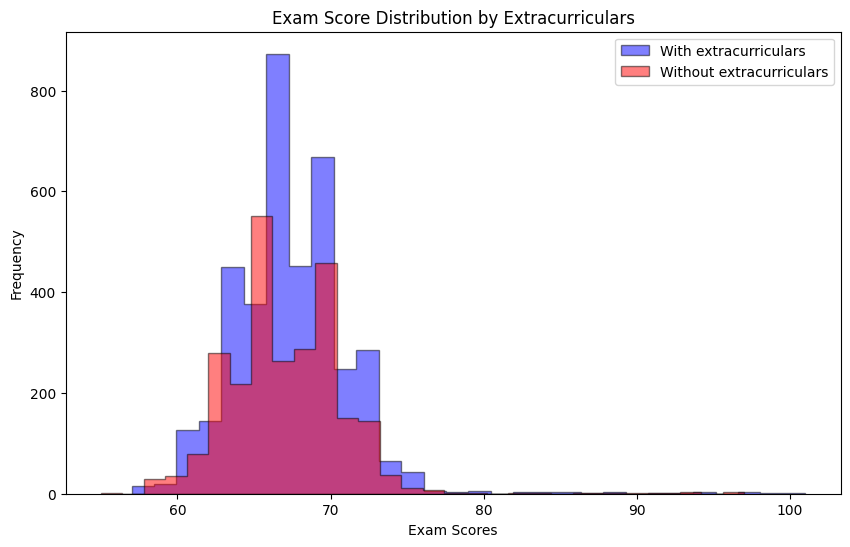

In [31]:
plt.figure(figsize=(10, 6))

plt.hist(ecYes, bins=30, alpha=0.5, label='With extracurriculars', color='blue', edgecolor='black', histtype='stepfilled')
plt.hist(ecNo, bins=30, alpha=0.5, label='Without extracurriculars', color='red', edgecolor='black', histtype='stepfilled')

plt.title('Exam Score Distribution by Extracurriculars')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

### **<font color='teal'>Hypothesis 2: Internet Access & Test Scores </font>**

H0: There is **NO** difference in exam scores between students who do or do not have internet access. \\


HA: There **IS** a difference in exam scores between students who do or do not


have internet access.

In [33]:
import numpy as np
import scipy.stats as stats

# Internet Access data
iaYes = df[df['Internet_Access'] == 'Yes']['Exam_Score']
iaNo = df[df['Internet_Access'] == 'No']['Exam_Score']

# mean, st dev & sample sizes
mean_yes = np.mean(iaYes)
mean_no = np.mean(iaNo)
std_yes = np.std(iaYes, ddof=1)
std_no = np.std(iaNo, ddof=1)
n_yes = len(iaYes)
n_no = len(iaNo)

# Z statistic
zstatIA = (mean_yes - mean_no) / np.sqrt((std_yes**2/n_yes) + (std_no**2/n_no))

# P-value
pvalIA = 2 * (1 - stats.norm.cdf(np.abs(zstatEC)))

if pvalIA < 0.05:
    print("Reject the null hypothesis. There is a significant difference in exam scores between students who have internet access and those who do not have internet access.")
    print("Z-statistic:", zstatIA)
    print("P-value:", pvalIA)
else:
    print("Fail to reject the null hypothesis. There is nosignificant difference in exam scores between students who have internet access and those who do not have internet access.")

Reject the null hypothesis. There is a significant difference in exam scores between students who have internet access and those who do not have internet access.
Z-statistic: 3.864662701621626
P-value: 3.6329230024279013e-07


Let's see if a box plot can help us visualize the different statistis between these 2 groups of students

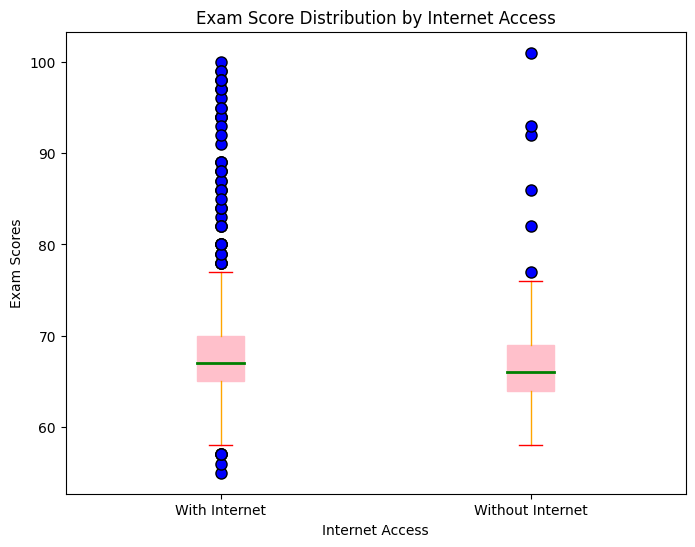

In [34]:
data_to_plot = [iaYes, iaNo]

plt.figure(figsize=(8, 6))
box = plt.boxplot(
    data_to_plot,
    labels=['With Internet', 'Without Internet'],
    patch_artist=True,
    boxprops=dict(facecolor='pink', color='pink'),
    whiskerprops=dict(color='orange'),
    capprops=dict(color='red'),
    medianprops=dict(color='green', linewidth=2),
    flierprops=dict(markerfacecolor='blue', marker='o', markersize=8)
)

plt.title('Exam Score Distribution by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Exam Scores')

plt.show()

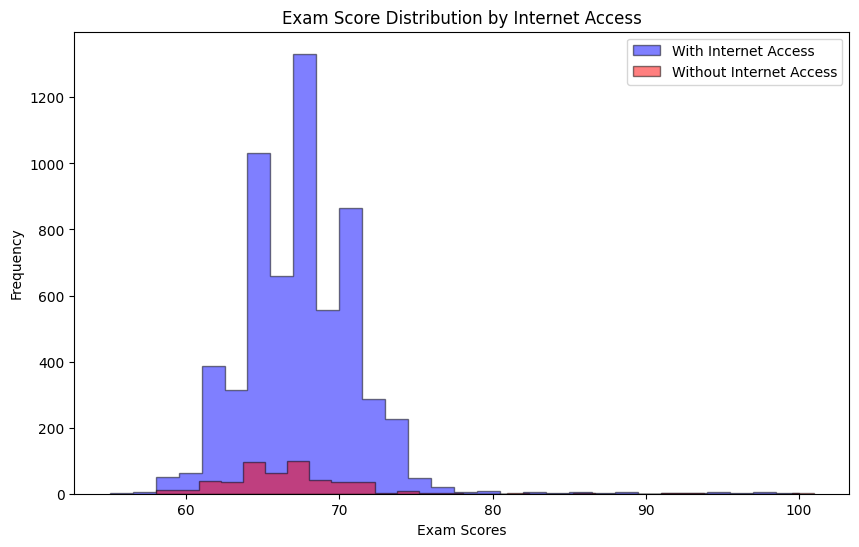

In [35]:
plt.figure(figsize=(10, 6))

plt.hist(iaYes, bins=30, alpha=0.5, label='With Internet Access', color='blue', edgecolor='black', histtype='stepfilled')
plt.hist(iaNo, bins=30, alpha=0.5, label='Without Internet Access', color='red', edgecolor='black', histtype='stepfilled')

plt.title('Exam Score Distribution by Internet Access')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## **<font color='green'>2.2: Bayesian Odds Tasks </font>**

TASK: Complete at least two bayesian odds tasks that yield interesting findings. Explain why your claims are supported by the data, and discuss their interesting implications

### **<font color='teal'>Bayesian Odds Task 1 </font>**


INTERNET ACCESS & HIGH TEST SCORE:
<font color='blue'>What are the Bayesian odds of a student having internet access, given that a student has an exam score above 80?




In [43]:

total_students = len(df)

priorIaYes = len(df[df['Internet_Access'] == 'Yes']) / total_students
priorIaNo = len(df[df['Internet_Access'] == 'No']) / total_students

likelihoodIaYes = len(df[(df['Internet_Access'] == 'Yes') & (df['Exam_Score'] > 80)]) / len(df[df['Internet_Access'] == 'Yes'])
likelihoodIaNo = len(df[(df['Internet_Access'] == 'No') & (df['Exam_Score'] > 80)]) / len(df[df['Internet_Access'] == 'No'])

evidIa = len(df[df['Exam_Score'] > 80]) / total_students

postIaYes = (likelihoodIaYes * priorIaYes) / evidIa
postIaNo = (likelihoodIaNo * priorIaNo) / evidIa

postIaYes, postIaNo
print("The Bayesian odds of a student having internet access, given that a student has a high exam score above 80, is " + str(posterior_internet_yes))


The Bayesian odds of a student having internet access, given that a student has a high exam score above 80, is 0.8837209302325582


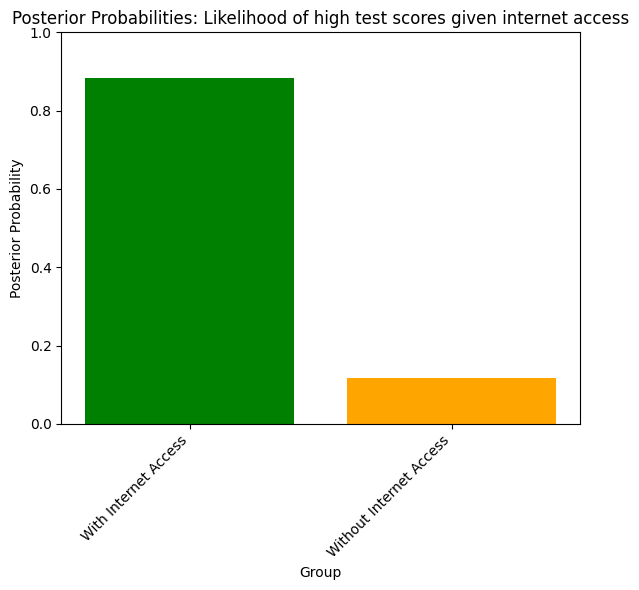

In [53]:
tasks = ['With Internet Access', 'Without Internet Access']
posterior_probs = [postIaYes, postIaNo]

plt.figure(figsize=(6, 6))
plt.bar(tasks, posterior_probs, color=['green', 'orange'])
plt.xlabel('Group')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probabilities: Likelihood of high test scores given internet access')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **<font color='teal'>Bayesian Odds Task 2 </font>**

<font color='blue'>What are the Bayesian Odds of Earning an Average Score,Between 65 and 75 Based on Motivation Level?


In [51]:
# Task 4: Bayesian Odds of Scoring Between 65 and 75 Based on Motivation Level
def safe_divide(numerator, denominator):
    return numerator / denominator if denominator != 0 else 0

priorHiMotiv = len(df[df['Motivation_Level'] == 'High']) / total_students
priorLoMotiv = len(df[df['Motivation_Level'] != 'High']) / total_students

likeliHiMotiv = safe_divide(len(df[(df['Motivation_Level'] == 'High') & (df['Exam_Score'].between(65, 75))]), len(df[df['Motivation_Level'] == 'High']))
likeliLoMotiv = safe_divide(len(df[(df['Motivation_Level'] != 'High') & (df['Exam_Score'].between(65, 75))]), len(df[df['Motivation_Level'] != 'High']))

evidMotiv = len(df[df['Exam_Score'].between(65, 75)]) / total_students

postHiMotiv = safe_divide(likeliHiMotiv * priorHiMotiv, evidMotiv)
postLoMotiv = safe_divide(likeliLoMotiv * priorLoMotiv, evidMotiv)
print("The Bayesian odds of scoring between 65 and 75, given a high motivation level, is " + str(postHiMotiv))
print("The Bayesian odds of scoring between 65 and 75, given a low motivation level, is " + str(postLoMotiv))


The Bayesian odds of scoring between 65 and 75, given a high motivation level, is 0.2097431716265797
The Bayesian odds of scoring between 65 and 75, given a low motivation level, is 0.7902568283734204


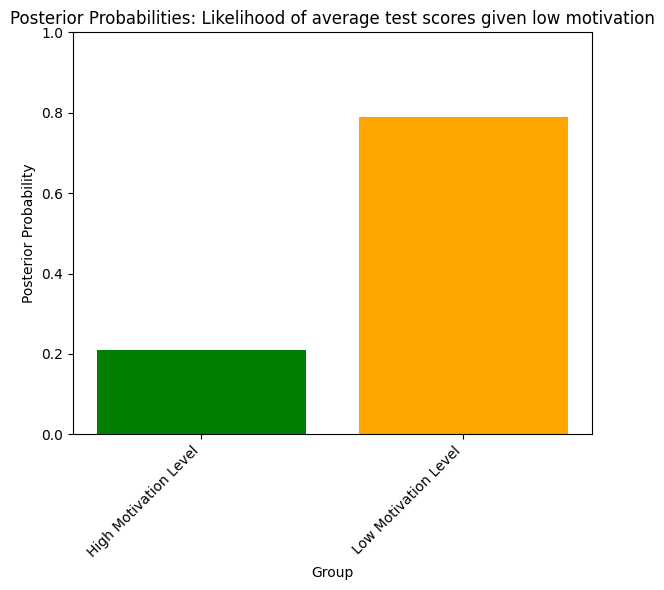

In [52]:
tasks = ['High Motivation Level', 'Low Motivation Level']
posterior_probs = [postHiMotiv, postLoMotiv]

plt.figure(figsize=(6, 6))
plt.bar(tasks, posterior_probs, color=['green', 'orange'])
plt.xlabel('Group')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probabilities: Likelihood of average test scores given low motivation')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()